<a href="https://www.kaggle.com/code/luisprezsala/batman?scriptVersionId=91356398" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Práctica 1: Análisis exporatorio de datos
---
Minería de Datos

Máster en Ciencia de Datos - Universidad de Alicante

<u>Integrantes:</u>

- Carlos Osman Suazo
- Enrique Morales
- Luis Pérez-Sala
- Alejandro Panagiotidis Arrizabalaga

# Justificación y objetivos
---

En esta primera práctica se nos pidio buscar una serie de datos y realizar un proceso de análisis sobre estos. El tema seleccionado es bucar si existe alguna relación entre el número de centros educativos (colegios y universidades) con los incidentes registrados por la policia en los diferentes distritos de la ciudad de San Francisco. El objetivo de esta práctica es el de poder extraer información relevante de dicho conjunto de datos.


In [1]:
######## Install Libraries ########
!pip install squarify
!pip install plotly


In [2]:
######## Loading Files ########
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud
import spacy
import plotly.express as px

DATASET_PATH = '../input/sanfranciscopolicedepartmentincidentreports/'
INCIDENTS_FILE = 'Police_Department_Incident_Reports__2018_to_Present.csv'
SCHOOLS_FILE  = 'Schools.csv'
COLLEGES_FILE = 'Schools_College.csv' 
DISTRICTS_FILE = 'SF_Police_districts.csv'

incidents_df = pd.read_csv(DATASET_PATH + INCIDENTS_FILE)
#districts_df = pd.read_csv(DATASET_PATH + DISTRICTS_FILE)
schools_df   = pd.read_csv(DATASET_PATH + SCHOOLS_FILE)
colleges_df  = pd.read_csv(DATASET_PATH + COLLEGES_FILE)

# 1. Análisis exploratorio
----

In [3]:
# Estructura de los datos
print(f'Incidentes data:\n Filas= {incidents_df.shape[0]} \t Columnas= {incidents_df.shape[1]}\n')
print(f'Nombre columnas: \n{list(incidents_df.columns)}\n')
print(f'Escuelas (Schools) data:\n Filas= {schools_df.shape[0]} \t Columnas= {schools_df.shape[1]}\n')
print(f'Nombre columnas: \n{list(schools_df.columns)}\n')
print(f'Universidades (Colleges) data:\n Filas= {colleges_df.shape[0]} \t Columnas= {colleges_df.shape[1]}\n')
print(f'Nombre columnas: \n{list(colleges_df.columns)}\n')
#print(f'Distritos data:\n Filas= {incidents_df.shape[0]} \t Columnas= {incidents_df.shape[1]}\n'

Incidentes data:
 Filas= 566245 	 Columnas= 34

Nombre columnas: 
['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year', 'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID', 'Incident Number', 'CAD Number', 'Report Type Code', 'Report Type Description', 'Filed Online', 'Incident Code', 'Incident Category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Intersection', 'CNN', 'Police District', 'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude', 'Point', 'Neighborhoods', 'ESNCAG - Boundary File', 'Central Market/Tenderloin Boundary Polygon - Updated', 'Civic Center Harm Reduction Project Boundary', 'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas', 'Current Supervisor Districts', 'Current Police Districts']

Escuelas (Schools) data:
 Filas= 445 	 Columnas= 21

Nombre columnas: 
['Campus Name', 'CCSF Entity', 'Lower Grade', 'Upper Grade', 'Grade Range', 'Category', 'Map Label', 'Lower Age', 'Upper Age

In [4]:
# Analizamos el número de escuelas por distrito policial
schools_per_district = schools_df.groupby(['Police Districts']).size() \
                                 .to_frame('size').reset_index()
fig = px.pie(schools_per_district, values='size', 
             names='Police Districts',
             labels={ 'Police Districts': 'Distrito policial',  
                'size': 'Núm. escuelas',
             },
             title='Distribución de escuelas por distritos policiales',
             hole=.4)
fig.update_layout(legend_title_text='Distrito policial')
fig.show()

Observando el gráfico anterior podemos ver que el distrito 8 cuenta con 74 (16.9%) escuelas mientras que el distrito 10 cuenta unicamente con 9 (2.05%), esta información nos puede resultar muy util durante el análisis de los resultados.

# 2. Preprocesado de datos
---
A lo largo de este apartado se aplicaran una serie de procesos de limpieza sobre los diferentes conjuntos de datos, esto nos permitirá eliminar tanto fallos en los datos como información innecesaria para el posterior análisis.   

## 2.1 Incidentes

In [5]:
# Eliminamos las siguientes columnas 
incidents_df = incidents_df.drop(['Row ID', 'Incident ID', 'Incident Number', 
                                  'CAD Number', 'Report Type Code', 
                                  'Report Type Description', 'Filed Online', 
                                  'CNN', 'Analysis Neighborhood', 
                                  'ESNCAG - Boundary File', 'Neighborhoods',
                                  'HSOC Zones as of 2018-06-05', 
                                  'Invest In Neighborhoods (IIN) Areas',
                                  'Civic Center Harm Reduction Project Boundary', # No existe información de esta columna
                                  'Central Market/Tenderloin Boundary Polygon - Updated'], # No existe información de esta columna
                                 axis=1)
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566245 entries, 0 to 566244
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Incident Datetime             566245 non-null  object 
 1   Incident Date                 566245 non-null  object 
 2   Incident Time                 566245 non-null  object 
 3   Incident Year                 566245 non-null  int64  
 4   Incident Day of Week          566245 non-null  object 
 5   Report Datetime               566245 non-null  object 
 6   Incident Code                 566245 non-null  int64  
 7   Incident Category             565761 non-null  object 
 8   Incident Subcategory          565761 non-null  object 
 9   Incident Description          566245 non-null  object 
 10  Resolution                    566245 non-null  object 
 11  Intersection                  536980 non-null  object 
 12  Police District               566245 non-nul

## 2.2 Distritos Policiales

## 2.3 Escuelas

In [6]:
# Obener las coordenadas de la escuela
# Nos quedamos con las coordenadas separadas por coma
schools_df['Location 1'] = schools_df['Location 1'].str.strip('CA\n()') 

# Separamos la cadena a partir de la coma y asignamos cada valor
# a una nueva columna Latitud y longitud
schools_df[['Latitude', 'Longitude']] = schools_df['Location 1'].str.split(', ', expand=True)

# Convertimos las columnas 'Latitude' y 'Longitude' a tipo float
schools_df[['Latitude', 'Longitude']] = schools_df[['Latitude', 'Longitude']].astype(float)

# Eliminamos la columna 'Location 1' junto con otras que no ofrecen 
# información relevante para el análisis.
schools_df = schools_df.drop(columns=['Location 1', 'Map Label', 'CDS Code', 
                                      'General Type', 'County Name', 
                                      'Neighborhoods (old)', 'Zip Codes'], 
                             axis=1)
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Campus Name                445 non-null    object 
 1   CCSF Entity                445 non-null    object 
 2   Lower Grade                445 non-null    int64  
 3   Upper Grade                445 non-null    int64  
 4   Grade Range                445 non-null    object 
 5   Category                   445 non-null    object 
 6   Lower Age                  445 non-null    int64  
 7   Upper Age                  445 non-null    int64  
 8   Campus Address             445 non-null    object 
 9   Supervisor District        445 non-null    int64  
 10  County FIPS                445 non-null    int64  
 11  Fire Prevention Districts  443 non-null    float64
 12  Police Districts           438 non-null    float64
 13  Supervisor Districts       445 non-null    int64  

## 2.4 Universidades

In [7]:
# Eliminamos las columnas: 
# webaddress, campus, phone, st_area_sh y st_length_
colleges_df = colleges_df.drop(['webaddress', 'campus', 'phone', 
                                'st_area_sh', 'st_length_'], axis=1)
# Renombramos las columnas: 
# the_geom -> geom_coordinates
# institutio -> college_name
colleges_df =colleges_df.rename(columns={'the_geom': 'geom_coordinates', 
                                         'institutio': 'college_name'})
colleges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   geom_coordinates  46 non-null     object
 1   college_name      46 non-null     object
 2   address           46 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


# Serie temporal: Evolución del número de incidentes por año y mes

Para comenzar sería interesante analizar la evoluión de los incidentes en los últimos años mediante series temporales en función de los meses. Esto puede responder a ciertas preguntas inciales como:
* ¿En qué meses se cometen más incidentes?
* ¿En la época de verano suele haber más robos?
* ¿Cómo ha afectado la pandemia del COVID-19?

<AxesSubplot:title={'center':'Número de incidentes por Mes/Año'}, xlabel='Mes', ylabel='Número de incidentes'>

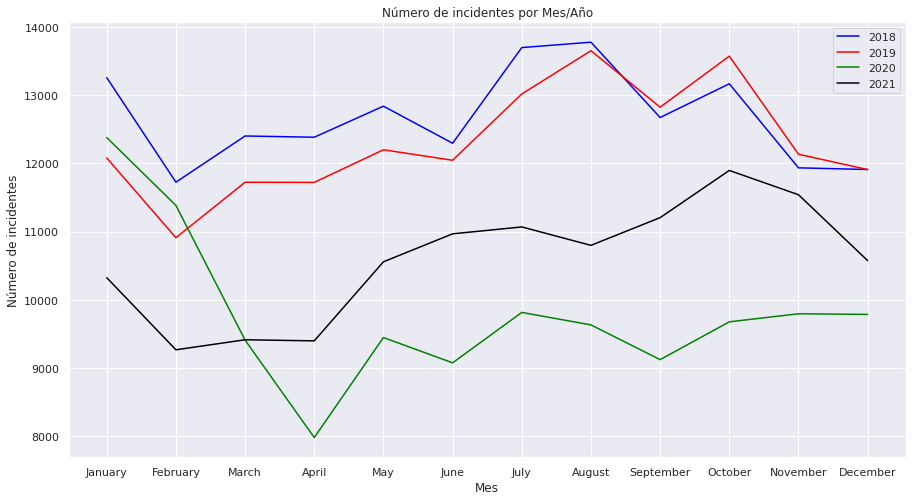

In [8]:
incidents_df['Incident Datetime'] = pd.to_datetime(incidents_df['Incident Datetime'])
incidents_df['Report Datetime'] = pd.to_datetime(incidents_df['Report Datetime'])
incidents_df = incidents_df.sort_values('Incident Datetime')

incidents_2018 = incidents_df[incidents_df['Incident Datetime'].between('2018-01-01', '2018-12-31')]
incidents_2019 = incidents_df[incidents_df['Incident Datetime'].between('2019-01-01', '2019-12-31')]
incidents_2020 = incidents_df[incidents_df['Incident Datetime'].between('2020-01-01', '2020-12-31')]
incidents_2021 = incidents_df[incidents_df['Incident Datetime'].between('2021-01-01', '2021-12-31')]
incidents_2022 = incidents_df[incidents_df['Incident Datetime'].between('2022-01-01', '2022-12-31')]

monthly_2018 = incidents_2018.groupby(incidents_2018['Incident Datetime'].dt.strftime('%B'))['Incident Datetime'].count()
monthly_2019 = incidents_2019.groupby(incidents_2019['Incident Datetime'].dt.strftime('%B'))['Incident Datetime'].count()
monthly_2020 = incidents_2020.groupby(incidents_2020['Incident Datetime'].dt.strftime('%B'))['Incident Datetime'].count()
monthly_2021 = incidents_2021.groupby(incidents_2021['Incident Datetime'].dt.strftime('%B'))['Incident Datetime'].count()
monthly_2022 = incidents_2022.groupby(incidents_2022['Incident Datetime'].dt.strftime('%B'))['Incident Datetime'].count()

months_sorted = sorted(monthly_2021.keys(), key=lambda day: datetime.strptime(day, "%B"))

sorted_2018 = [] 
sorted_2019 = []
sorted_2020 = []
sorted_2021 = []
sorted_2022 = []

for month in months_sorted:
    sorted_2018.append(monthly_2018[month])
    sorted_2019.append(monthly_2019[month])
    sorted_2020.append(monthly_2020[month])
    sorted_2021.append(monthly_2021[month])

sns.set_theme(style="darkgrid")

sns.set(rc={'figure.figsize':(15,8)})

plt.title("Número de incidentes por Mes/Año")
plt.xlabel("Mes")
plt.ylabel("Número de incidentes")

sns.lineplot(x=months_sorted, y=sorted_2018, color='blue',  legend='brief', label=str('2018'))
sns.lineplot(x=months_sorted, y=sorted_2019, color='red',   legend='brief', label=str('2019'))
sns.lineplot(x=months_sorted, y=sorted_2020, color='green', legend='brief', label=str('2020'))
sns.lineplot(x=months_sorted, y=sorted_2021, color='black', legend='brief', label=str('2021'))

Observando la serie temporal anterior apreciamos que el número de incidentes ha sufrido un descenso muy pronunciado en la época del confinamiento debido al COVID-19 entre los meses febrero y abril del año 2020 con respecto a los años anteriores. 

No obstante, a partir de abril podemos apreciar que la tendencia que inicialmente se había roto hasta abril, se recupera a partir de mayo debido a la relajación de medidas del gobierno.

También apreciamos un aumento considerable de incidentes en los meses de julio y agosto históricamente.

# Comparación incidentes época COVID-19/No-COVID-19

En esta sección analizaremos qué tipos de incidentes ocurrieron durante la etapa de confinamiento y los compararemos con los del año anterior.

El objetivo es mostrar el TOP-5 de incidentes que más han variado proporcionalmente en la distribución de ambas épocas.  

,Incident,Not COVID incident count,Not COVID Percentage,COVID incident count,COVID Percentage,Difference (ABS)
0,Larceny Theft,4975,0.304412,2517,0.231661,0.072750
5,Burglary,714,0.043688,988,0.090934,0.047246
6,Motor Vehicle Theft,589,0.036040,707,0.065071,0.029031
10,Lost Property,689,0.042159,179,0.016475,0.025684
2,Malicious Mischief,1020,0.062412,956,0.087989,0.025577


[Text(0.5, 1.0, '2020 March-May')]

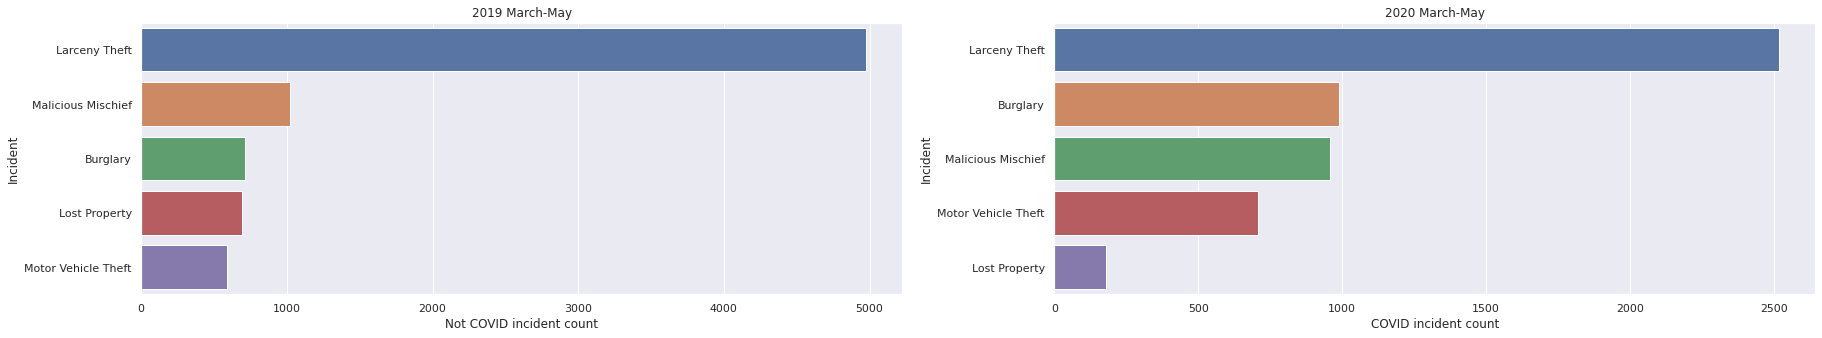

In [9]:
############ COVID ############
not_covid_data_frame = incidents_2019[incidents_2019['Incident Datetime'].between('2019-03-20', '2019-05-01')]
covid_data_frame = incidents_2020[incidents_2020['Incident Datetime'].between('2020-03-20', '2020-05-01')]

not_covid_order = pd.Categorical(not_covid_data_frame['Incident Category'].value_counts().index)
covid_order = pd.Categorical(covid_data_frame['Incident Category'].value_counts().index)

difference_dataframe = pd.DataFrame(columns=['Incident', 'Not COVID incident count','Not COVID Percentage',
                                              'COVID incident count', 'COVID Percentage', 'Difference (ABS)'])

for incident in incidents_df['Incident Category'].value_counts().iteritems():
    not_covid_incident_count = (not_covid_data_frame['Incident Category'] == incident[0]).sum()
    covid_incident_count     = (covid_data_frame['Incident Category'] == incident[0]).sum()
    
    not_covid_percentage = not_covid_incident_count / len(not_covid_data_frame)
    covid_percentage     = covid_incident_count / len(covid_data_frame)

    difference_dataframe = difference_dataframe.append({'Incident': incident[0],
                                                        'Not COVID incident count': not_covid_incident_count,
                                                        'Not COVID Percentage': not_covid_percentage,
                                                        'COVID incident count': covid_incident_count,
                                                        'COVID Percentage': covid_percentage,
                                                        'Difference (ABS)': np.abs(covid_percentage - not_covid_percentage)},
                                                       ignore_index=True)

difference_dataframe = difference_dataframe.sort_values('Difference (ABS)', ascending = False)[:5]
not_covid_display = difference_dataframe.sort_values('Not COVID incident count', ascending = False)
covid_display     = difference_dataframe.sort_values('COVID incident count', ascending = False)

display(difference_dataframe)

sns.set(rc={'figure.figsize':(30,5)})
fig, ax =plt.subplots(1,2)
sns.barplot(data=not_covid_display, x='Not COVID incident count', y="Incident", ax=ax[0]).set(title='2019 March-May')
sns.barplot(data=covid_display, x='COVID incident count', y="Incident", ax=ax[1]).set(title='2020 March-May')

Observamos que el número de hurtos en la época del confinamiento ha descendido considerablemente con respecto a la misma época del año anterior, llegando incluso a la mitad.

Los allanamientos de morada han aumentado un 4% con respecto al anterior año, seguido de un descenso del 2% de los actos de vandalismo.



# Comparación incidentes Febrero/Octubre 2021

Debido a que en la gráfica temporal mostrada anteriormente se aprecia que en el año 2021 se producen muchos más incidentes en octubre que en febrero, analizaremos qué tipo de incidentes se cometen en ambos periodos.

El objetivo es mostrar el TOP-5 de incidentes que más han variado proporcionalmente en la distribución de ambas épocas.  

,Incident,February incident count,February Percentage,October incident count,October Percentage,Difference (ABS)
0,Larceny Theft,3859,0.334257,2049,0.228990,0.105268
5,Burglary,619,0.053616,784,0.087617,0.034001
7,Recovered Vehicle,467,0.040450,529,0.059119,0.018669
1,Other Miscellaneous,736,0.063751,715,0.079906,0.016156
11,Drug Offense,183,0.015851,224,0.025034,0.009183


[Text(0.5, 1.0, 'October')]

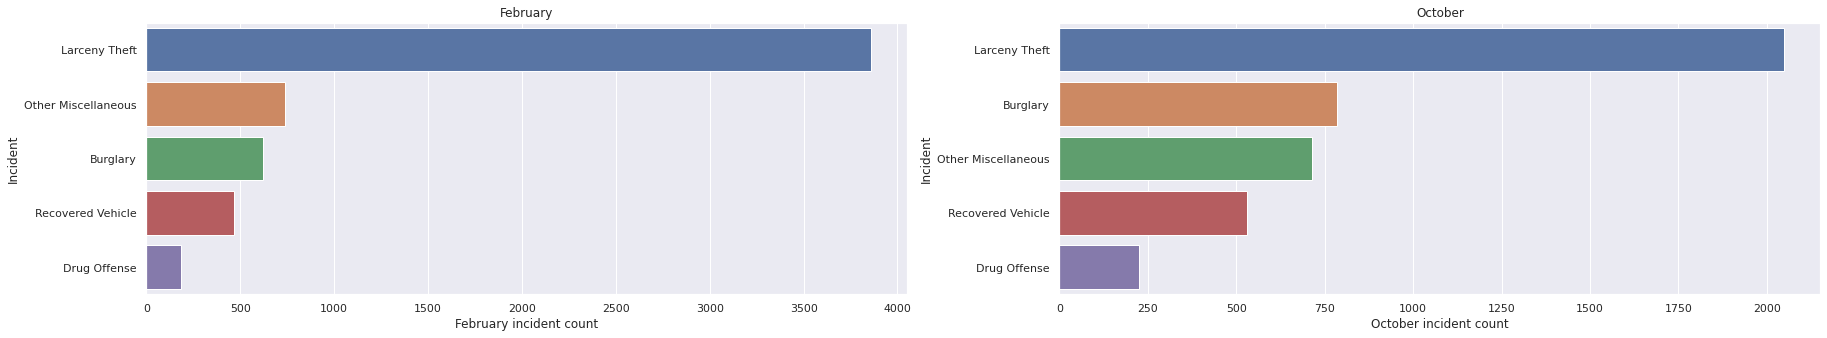

In [10]:
############ SUMMER ############
february_data_frame = incidents_2021[incidents_2021['Incident Datetime'].between('2021-10-01', '2021-10-31')]
october_data_frame = incidents_2021[incidents_2021['Incident Datetime'].between('2021-02-01', '2021-02-28')]

february_order = pd.Categorical(february_data_frame['Incident Category'].value_counts().index)
october_order = pd.Categorical(october_data_frame['Incident Category'].value_counts().index)


difference_dataframe = pd.DataFrame(columns=['Incident', 'February incident count','February Percentage',
                                              'October incident count', 'October Percentage', 'Difference (ABS)'])

for incident in incidents_df['Incident Category'].value_counts().iteritems():
    february_incident_count = (february_data_frame['Incident Category'] == incident[0]).sum()
    october_incident_count  = (october_data_frame['Incident Category'] == incident[0]).sum()
    
    february_percentage = february_incident_count / len(february_data_frame)
    october_percentage    = october_incident_count / len(october_data_frame)

    difference_dataframe = difference_dataframe.append({'Incident': incident[0],
                                                        'February incident count': february_incident_count,
                                                        'February Percentage': february_percentage,
                                                        'October incident count': october_incident_count,
                                                        'October Percentage': october_percentage,
                                                        'Difference (ABS)': np.abs(october_percentage - february_percentage)},
                                                       ignore_index=True)

difference_dataframe = difference_dataframe.sort_values('Difference (ABS)', ascending = False)[:5]
february_display = difference_dataframe.sort_values('February incident count', ascending = False)
october_display  = difference_dataframe.sort_values('October incident count', ascending = False)

display(difference_dataframe)  
    
    
sns.set(rc={'figure.figsize':(30,5)})
fig, ax =plt.subplots(1,2)
sns.barplot(data=february_display, x='February incident count', y="Incident", ax=ax[0]).set(title='February')
sns.barplot(data=october_display, x='October incident count', y="Incident", ax=ax[1]).set(title='October')

# Incidentes más frecuentes Día/Noche
Analizaremos qué incidentes son más frecuentes en las horas diurnas y nocturnas mostrando un TOP-5 de aquellos que 

In [11]:
daily_data_frame   = incidents_df[incidents_df['Incident Datetime'].dt.strftime("%H:%M:%S").between('07:00:00', '18:00:00')]
nightly_data_frame = incidents_df[incidents_df['Incident Datetime'].dt.strftime("%H:%M:%S").between('18:00:01', '23:59:59')]
nightly_data_frame = nightly_data_frame.append(incidents_df[incidents_df['Incident Datetime'].dt.strftime("%H:%M:%S").between('00:00:00', '06:59:59')])

,Incident,Daily incident count,Daily Percentage,Nightly incident count,Nightly Percentage,Difference (ABS)
5,Burglary,13360,0.041951,18917,0.076347,0.034397
2,Malicious Mischief,18080,0.056771,20133,0.081255,0.024484
3,Non-Criminal,21704,0.068151,12687,0.051204,0.016947
11,Drug Offense,9618,0.030201,3597,0.014517,0.015683
8,Warrant,11153,0.035021,6254,0.025241,0.009780


[Text(0.5, 1.0, 'Nightly')]

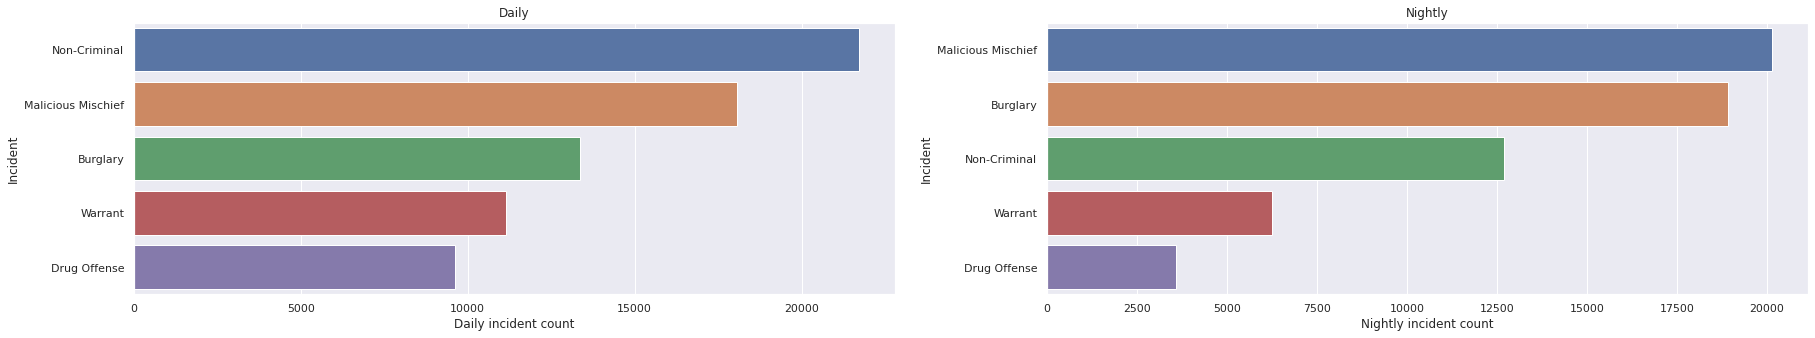

In [12]:
difference_dataframe = pd.DataFrame(columns=['Incident', 'Daily incident count','Daily Percentage',
                                              'Nightly incident count', 'Nightly Percentage', 'Difference (ABS)'])

for incident in incidents_df['Incident Category'].value_counts().iteritems():
    daily_incident_count = (daily_data_frame['Incident Category'] == incident[0]).sum()
    nightly_incident_count  = (nightly_data_frame['Incident Category'] == incident[0]).sum()
    
    daily_percentage = daily_incident_count / len(daily_data_frame)
    nightly_percentage    = nightly_incident_count / len(nightly_data_frame)

    difference_dataframe = difference_dataframe.append({'Incident': incident[0],
                                                        'Daily incident count': daily_incident_count,
                                                        'Daily Percentage': daily_percentage,
                                                        'Nightly incident count': nightly_incident_count,
                                                        'Nightly Percentage': nightly_percentage,
                                                        'Difference (ABS)': np.abs(nightly_percentage - daily_percentage)},
                                                       ignore_index=True)

difference_dataframe = difference_dataframe.sort_values('Difference (ABS)', ascending = False)[:5]
daily_display = difference_dataframe.sort_values('Daily incident count', ascending = False)
nightly_display  = difference_dataframe.sort_values('Nightly incident count', ascending = False)

display(difference_dataframe)  
    
sns.set(rc={'figure.figsize':(30,5)})
fig, ax =plt.subplots(1,2)
sns.barplot(data=daily_display, x='Daily incident count', y="Incident", ax=ax[0]).set(title='Daily')
sns.barplot(data=nightly_display, x='Nightly incident count', y="Incident", ax=ax[1]).set(title='Nightly')

# Revisaremos la correlación de los datasets utilizando matrices de correlación:
1. Police Departmen Incidents
2. Schools College
3. Schools

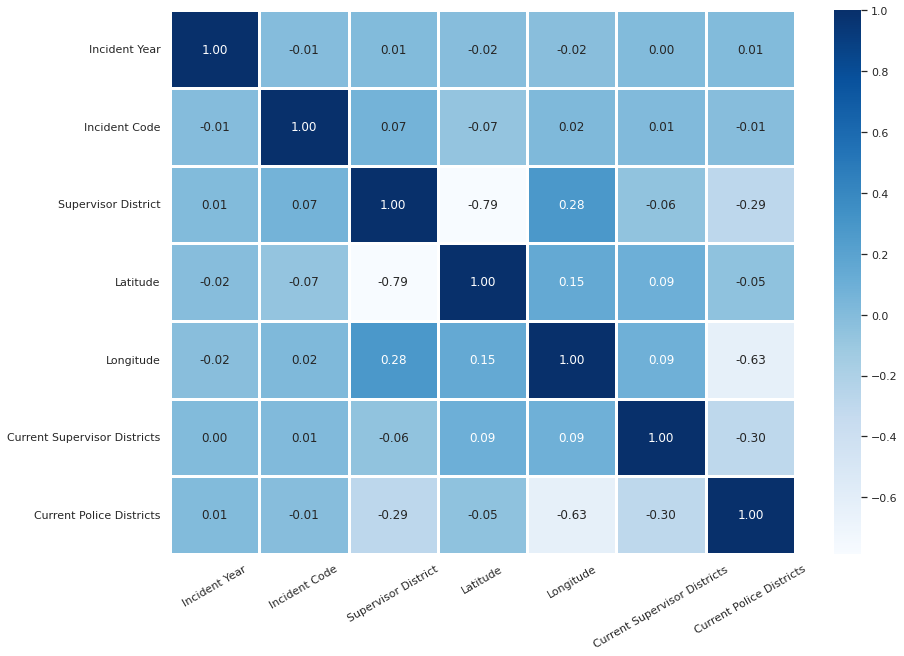

In [13]:
#print(incidents_df.info())
#print(schools_df.info())
#print(colleges_df.info())


incidents = incidents_df.copy()

plt.figure(figsize=(14, 10))
sns.heatmap(incidents.corr('spearman'), annot=True, fmt='.2f', linewidth=3, cmap='Blues')
plt.yticks(rotation=0)
plt.xticks(rotation=30)
plt.show()

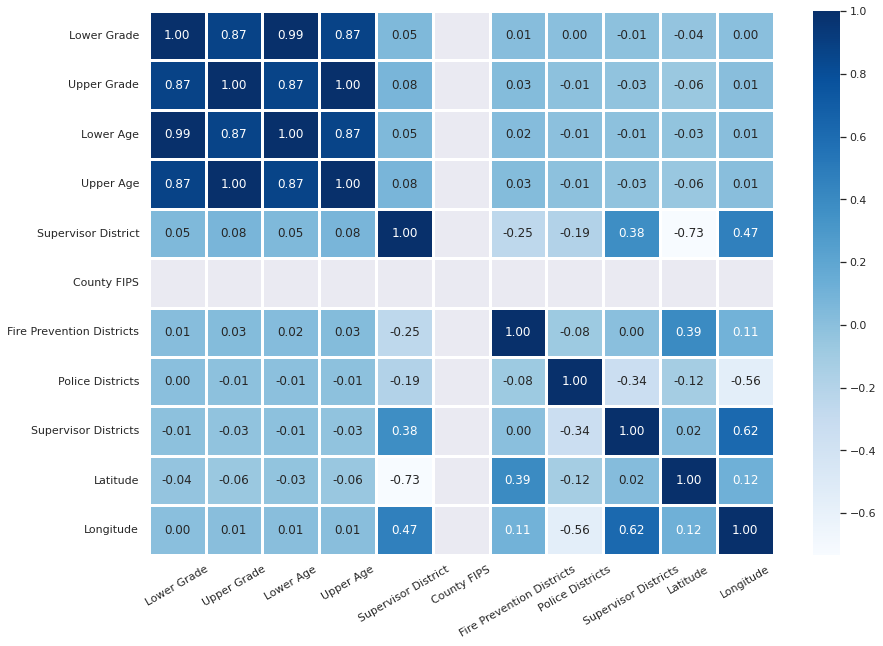

In [14]:
schools = schools_df.copy()

plt.figure(figsize=(14, 10))
sns.heatmap(schools.corr('spearman'), annot=True, fmt='.2f', linewidth=3, cmap='Blues')
plt.yticks(rotation=0)
plt.xticks(rotation=30)
plt.show()

# Diagrama de Arbol de las "Categorías de Crimen" mas frecuentes

El siguiente diagráma de árbol muestra una distribución de la proporción de las categorías de incidentes más comunes en el área de San Francisco, siendo el más cómun el "Larceny Theft" "Hurto Robo". Estas categorías no nos brindan suficiente información del tipo de incidente, por lo cual en la siguiente celda analizaremos las sub-categorías, estas brindan mejores descripciones de lo acontecido.

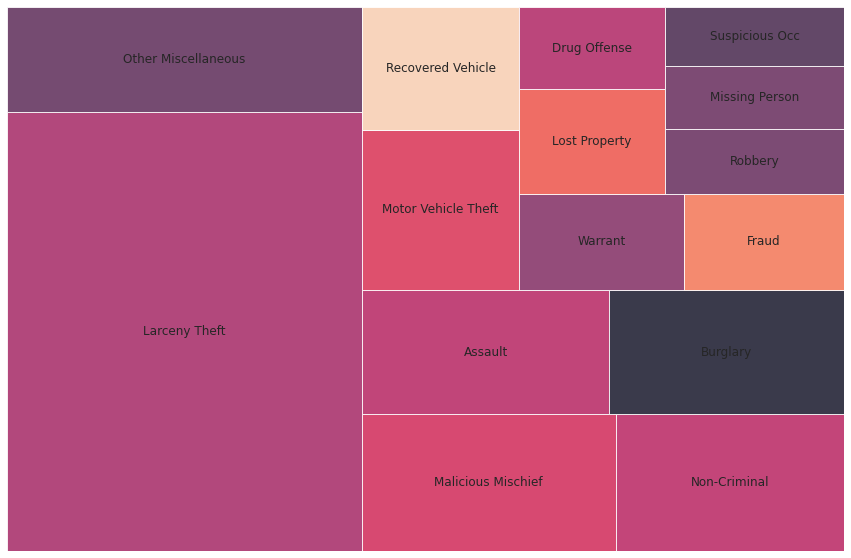

In [15]:
incidents_category = incidents_df['Incident Category'].value_counts()[:15].copy()

plt.figure(figsize=(15,10))
squarify.plot(sizes=incidents_category.values, label=incidents_category.index, alpha=.8)
plt.axis('off')
plt.show()

# Diagrama de Arbol de las "Subcategorías de Crimen" mas frecuentes

El siguiente diagráma de árbol muestra una distribución de la proporción de las subcategorías de incidentes más comunes en el área de San Francisco, siendo el más cómun el "Larceny - From Vehicle" "Hurto - De Vehicule ", podemos que otra de las sucategorías mayoritarias es "Other", esta categoría no aporta información y es un label utilizado para clasificar todo no que no tiene un sentido para la policía. por esto procederemos a remover esta subcategoría y así dejar paso a una subcategoría que sea más explicativa.

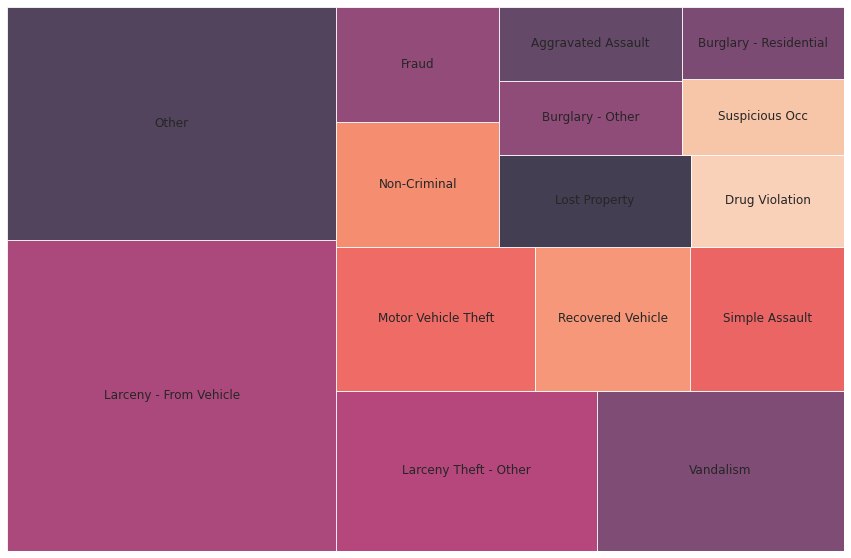

In [16]:
incidents_category = incidents_df['Incident Subcategory'].value_counts()[:15].copy()

plt.figure(figsize=(15,10))
squarify.plot(sizes=incidents_category.values, label=incidents_category.index, alpha=.8)
plt.axis('off')
plt.show()

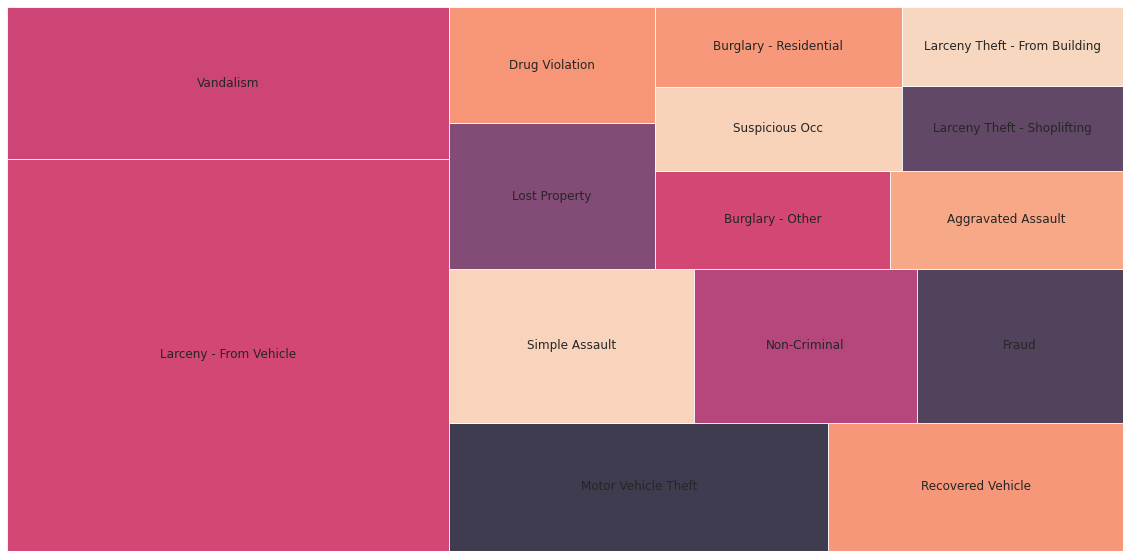

In [17]:
incidents_category = incidents_df[~incidents_df['Incident Subcategory'].isin(['Other','Larceny Theft - Other'])]['Incident Subcategory'].value_counts()[:15].copy()

plt.figure(figsize=(20,10))
squarify.plot(sizes=incidents_category.values, label=incidents_category.index, alpha=.8)
plt.axis('off')
plt.show()

Después de haber quitado las subcategorías que no aportaban información en su label, por ejemplo Other y Larceny - Other, podemos observar que "Larceny - From Vehicle" es de las subcategorías más comunes. Esto podría brindar suficiente información para poder realizar campañas de concientización para sugerir a las personas no dejar objetos en los coches. 

# Nube de palabras para análizar las descripciones de los incidentes reportados

In [18]:
nlp = spacy.load('en_core_web_sm') # Utilizamo el SM porque no se puede cargar el Medium

list_words = [x.split() for x in incidents_df['Incident Description'].values]  # Obtenemos todas las palabras individuales para cada nombre
list_words = ' '.join([word for sublist in list_words for word in sublist])  # Las juntamos todas en un único texto
list_words = list_words[:1000000]

corpus = nlp(list_words)  # Procesamos las palabras con SpaCy
tokens = [w.lower_ for w in corpus if (not w.is_space and not w.is_punct)]  # Eliminamos espacios en blanco y signos de puntuación
corpus = ' '.join(tokens)  # Ya tenemos la lista de palabras limpia

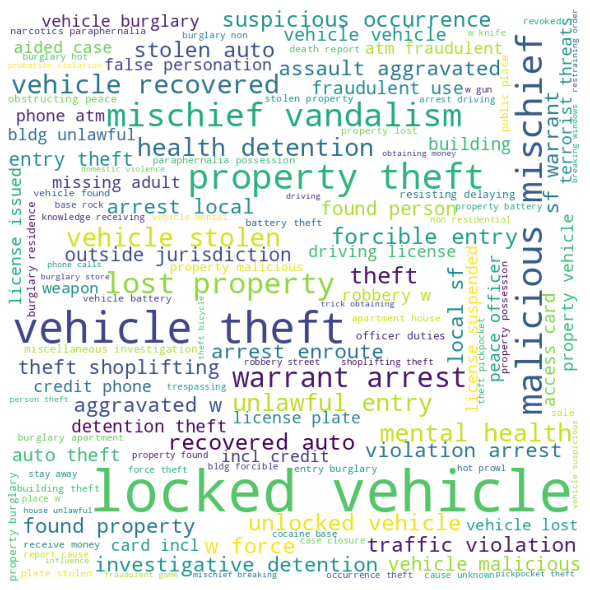

In [19]:
wordcloud = WordCloud(width=700, height=700, background_color='white', min_font_size=10).generate(corpus)
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()

En este caso hacemos un análisis de las descripciones de todas los incidentes, para poder identificar en un Word Cloud cuales son los las palabras más comunes. En las descripciones podemos observar que "Locked Vehicle" "Vehicle Theft" y "Property Theft"

## Calculamos el tiempo promedio de reporte por categoría de incidente

Este análisis se centra en ver el tiempo pormedio que demoran las personas en reportar un incidente, tomando en consideración la fecha en la ocurrió el incidente menos la fecha de reporte en las oficinas de la policia. 

In [20]:
# Calcular el tiempo promedio de reporte de un incidente y ver si tiene algún sentido.
# obtenemos la diferencia de tiempo entre la fecha de reporte y la fecha del incidente.
incidents_df['Difference Date'] = abs(incidents_df['Incident Datetime'] - incidents_df['Report Datetime'])

## Tiempo promedio de reporte
Este es el top 15 de las categorías de incidentes que más demoran en reportarse, con este análisis tenemos que el tráfico de humanos ha demorado más en reportarse. Hay que considerar que en el dataset solo se cuenta con un registro. Los delitos de malverzación tienen un promedio tiempo de reporte arriba de los 50 días.

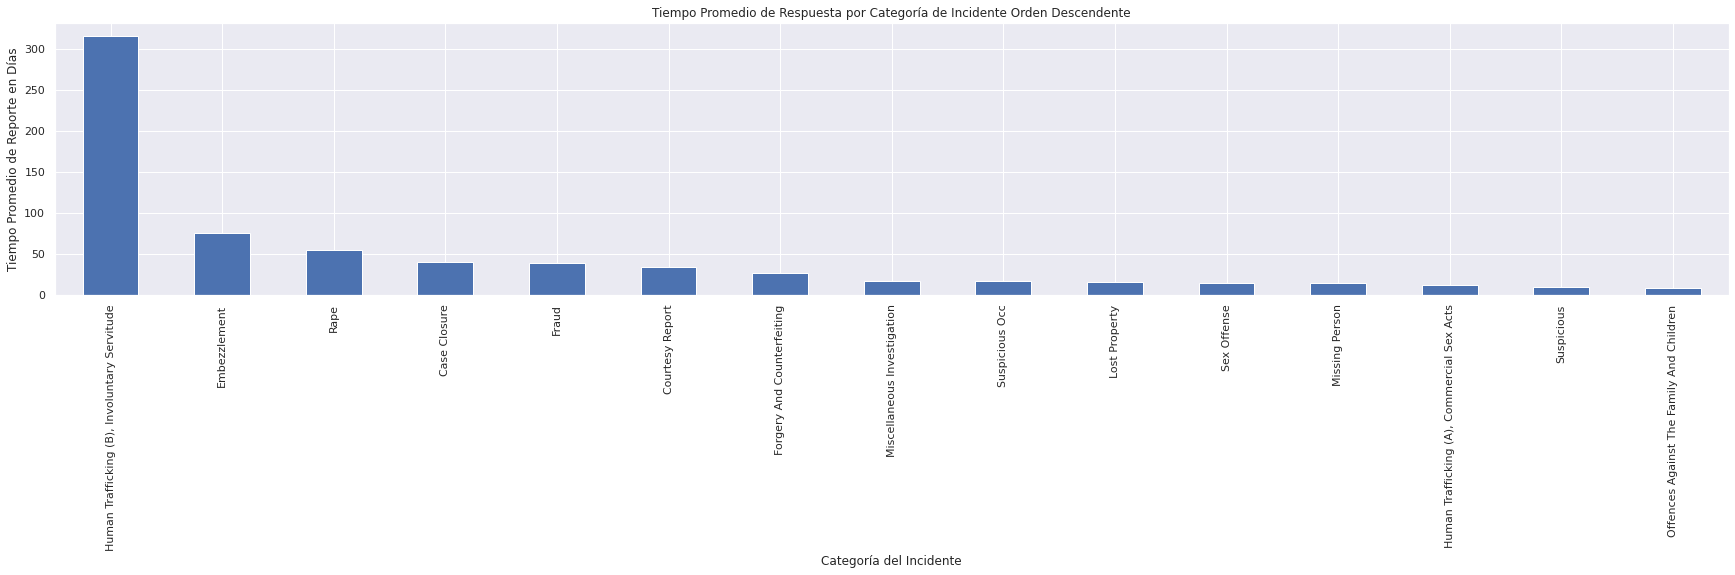

In [21]:
df_Test = incidents_df.groupby('Incident Category')['Difference Date'].mean().sort_values(ascending = False)[:15].astype('timedelta64[h]') / 24
df_Test.plot(kind = 'bar', title = 'Tiempo Promedio de Respuesta por Categoría de Incidente Orden Descendente', rot = 90)

plt.xlabel('Categoría del Incidente')
plt.ylabel('Tiempo Promedio de Reporte en Días')
plt.show()

Este es el top 15 de las categorías de incidentes que más rápido se reportan. Por ejemplo el vandalismo tiene un tiempo promedio de reporte arriba de 2.5 días 

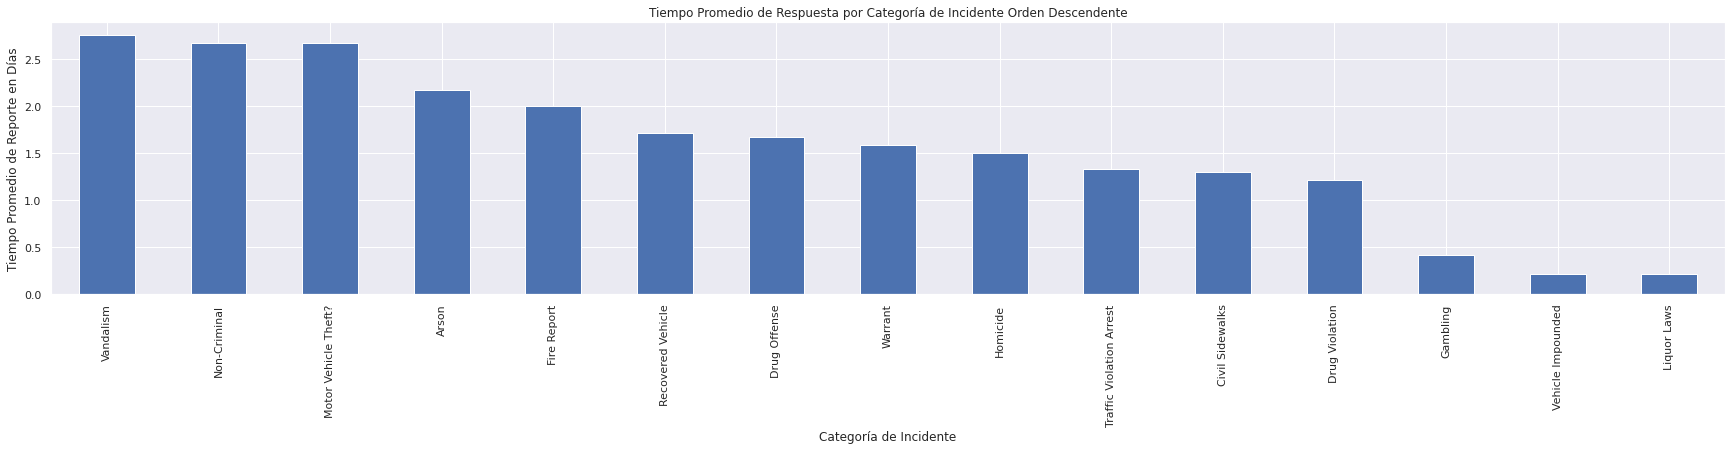

In [22]:
df_Test = incidents_df.groupby('Incident Category')['Difference Date'].mean().sort_values()[:15].sort_values(ascending = False).astype('timedelta64[h]') / 24
df_Test.plot(kind = 'bar', title = 'Tiempo Promedio de Respuesta por Categoría de Incidente Orden Descendente', rot = 90)

plt.xlabel('Categoría de Incidente')
plt.ylabel('Tiempo Promedio de Reporte en Días')
plt.show()

# Plots de crímenes por código ID

In [23]:
import pandas as pd
import folium
from folium import plugins

df_og = pd.read_csv("../input/sanfranciscopolicedepartmentincidentreports/Police_Department_Incident_Reports__2018_to_Present.csv")
df=df_og.groupby(['Police District', 'Incident Code'], as_index=False).size()
df['Police District'] = df['Police District'].str.upper()
names_df = df['Police District'].unique()
id_crimes = df['Incident Code'].unique()

####### all crimes id #######
#for id_name in id_crimes:
#    df_counts = pd.DataFrame()
#    
#    for it in names_df:
        #df_counts = df_counts.append(df.loc[(df['Police District'] == it) & (df['Incident Code'] == id_name)].nlargest(1, columns=['size']))
    
    # df_counts = df_counts.drop(index=3021)
    
    #sf_map = folium.Map()
    #sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
    #folium.TileLayer('stamenterrain').add_to(sf_map)
    #sf_geo = r'../input/sfgeojson/san-francisco.geojson'
    
    #sf_map.choropleth(
    #    geo_data=sf_geo,
    #    data=df_counts,
    #    columns=['Police District', 'size'],
    #    key_on='feature.properties.DISTRICT',
    #    fill_color='YlOrRd', 
    #    fill_opacity=0.7, 
    #    line_opacity=0.4,
    #    legend_name='Number of crimes',
    #    name=id_name
    #)
    
    #loc = 'Incident Code: '+str(id_name)
    #title_html = '''
    #             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
    #             '''.format(loc)   
    #sf_map.get_root().html.add_child(folium.Element(title_html))
    
    #sf_map.save(str(id_name)+"_"+"SFmap.html")

### Crímenes más cometidos con código ID por distrito

In [24]:
####### top crimes id by district #######

# bayview, central, ingleside,  mission, northern, parkside, richmond, southern, taraval, tenderloin 
lat_ = [37.7311, 37.7782, 37.7235,  37.7599300,  37.8011749, 37.7392,  37.7803, 37.77217, 37.7631, 37.78365]
long_ = [-122.3849, -122.4011, -122.4349, -122.4191376, -122.4090021, -122.484, -122.4715, -122.38909, -122.4546, -122.41295]

df_counts = pd.DataFrame()

for it in names_df:
    df_counts = df_counts.append(df.loc[df['Police District'] == it].nlargest(1, columns=['size']))

df_counts = df_counts.drop(index=3021)

sf_map = folium.Map()
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
folium.TileLayer('stamenterrain').add_to(sf_map)
sf_geo = r'../input/sfgeojson/san-francisco.geojson'

#sf_map.choropleth(
#    geo_data=sf_geo,
#    data=df_counts,
#    columns=['Police District', 'size'],
#    key_on='feature.properties.DISTRICT',
#    fill_color='YlOrRd', 
#    fill_opacity=0.7, 
#    line_opacity=0.4,
#    legend_name='Number of crimes',
#    name='Most common crimes by district'
#)

loc = 'Top Crimes by District'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
#sf_map.get_root().html.add_child(folium.Element(title_html))

#for lat, lon, value in zip(lat_,long_,df_counts['Incident Code']):
#    folium.Marker(location=[lat,lon],
#                  icon=folium.DivIcon(html=f"""<div style="">{value}</div>""")
#                  ).add_to(sf_map)

# for lat, lon, value in zip(lat_,long_,df_counts['Incident Code']):
#     folium.Marker(location=[lat,lon],
#                   popup=value
#                   ).add_to(sf_map)

# locations = list(zip(lat_, long_))
# cluster = plugins.MarkerCluster(locations=locations,                     
#                popups=df_counts["Incident Code"].tolist())  
# sf_map.add_child(cluster)

#sf_map.save("mc_"+"SFmap.html")

In [25]:
#from IPython.display import IFrame
#IFrame(src='6378_SFmap.html', width=900, height=600)
'''
import IPython
IPython.display.HTML(filename='/path/to/your/filename')
'''

"\nimport IPython\nIPython.display.HTML(filename='/path/to/your/filename')\n"

# Conclusión
---